#Procesamiento de las Series de Tiempo

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_excel('/content/Calamar1.xlsx')
df.columns = ['fecha', 'caudal']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   fecha   962 non-null    datetime64[ns]
 1   caudal  951 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 15.2 KB


In [ ]:
df = df[['fecha', 'caudal']]
df.sort_index(inplace=True)

In [ ]:
print('Cantidad de datos faltantes:')
for column in df:
    nans = df[column].isna().sum()
    print(f'\tColumna {column}: {nans}')

Cantidad de datos faltantes:
	Columna fecha: 0
	Columna caudal: 11


In [ ]:
#Inteerpolación de los datos faltantes, que es solo q
#for column in df.columns:
df['caudal'] = df['caudal'].interpolate(method='linear')
df.info()
df_caudal = df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   fecha   962 non-null    datetime64[ns]
 1   caudal  962 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 15.2 KB


In [ ]:
df['anio'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month

In [ ]:
df = df[['anio', 'mes', 'caudal']]
df

,anio,mes,caudal
0,1940,8,3735.000000
1,1940,9,4497.000000
2,1940,10,6584.000000
3,1940,11,8529.000000
4,1940,12,8241.000000
...,...,...,...
957,2020,5,4163.438793
958,2020,6,5611.849167
959,2020,7,6987.471774
960,2020,8,7277.534274


In [ ]:
import re

file=open('/content/AMMsst.txt','r', encoding='utf-8')
infile=file.readlines()
AMMsst = []
for linea in infile:
  linea = linea.replace('\ufeff', '')
  linea = linea.replace('\n', '')

  patron = r'-?\d{1}.\d{2}'
  coincidencias = re.findall(patron, linea)

  for mes in range(1, len(coincidencias)):
    AMMsst.append([coincidencias[0], mes , coincidencias[mes]])

AMMsst_df = pd.DataFrame(AMMsst, columns=['anio', 'mes', 'AMMsst'])
AMMsst_df


,anio,mes,AMMsst
0,1948,1,0.66
1,1948,2,0.00
2,1948,3,1.00
3,1948,4,1.86
4,1948,5,1.30
...,...,...,...
769,2012,2,1.33
770,2012,3,-2.18
771,2012,4,-1.23
772,2012,5,-0.85


In [ ]:
file=open('/content/BEST.txt','r', encoding='utf-8')
infile=file.readlines()
BEST = []
for linea in infile:
  linea = linea.replace('\ufeff', '')
  linea = linea.replace('\n', '')

  patron = r'-?\d{1}.\d{2}'
  coincidencias = re.findall(patron, linea)

  for mes in range(1, len(coincidencias)):
    BEST.append([coincidencias[0], mes , coincidencias[mes]])

BEST_df = pd.DataFrame(BEST, columns=['anio', 'mes', 'BEST'])
BEST_df

,anio,mes,BEST
0,1870,1,-0.94
1,1870,2,-0.80
2,1870,3,-0.25
3,1870,4,-0.76
4,1870,5,-0.91
...,...,...,...
1832,2022,9,-1.87
1833,2022,10,-1.78
1834,2022,11,-0.62
1835,2022,12,-2.01


In [ ]:
file=open('/content/NINO3.txt','r', encoding='utf-8')
infile=file.readlines()
NINO3 = []
for linea in infile:
  linea = linea.replace('\ufeff', '')
  linea = linea.replace('\n', '')

  patron = r'-?\d{1}.\d{2}'
  coincidencias = re.findall(patron, linea)

  for mes in range(1, len(coincidencias)):
    NINO3.append([coincidencias[0], mes , coincidencias[mes]])

NINO3_df = pd.DataFrame(NINO3, columns=['anio', 'mes', 'NINO3'])
NINO3_df

,anio,mes,NINO3
0,1870,1,-1.35
1,1870,2,-1.20
2,1870,3,-0.76
3,1870,4,-0.78
4,1870,5,-1.15
...,...,...,...
1835,2022,12,-0.84
1836,2023,1,-0.64
1837,2023,2,-0.47
1838,2023,3,0.23


In [ ]:
file=open('/content/NINO34.txt','r', encoding='utf-8')
infile=file.readlines()
NINO34 = []
for linea in infile:
  linea = linea.replace('\ufeff', '')
  linea = linea.replace('\n', '')

  patron = r'-?\d{1}.\d{2}'
  coincidencias = re.findall(patron, linea)

  for mes in range(1, len(coincidencias)):
    NINO34.append([coincidencias[0], mes , coincidencias[mes]])

NINO34_df = pd.DataFrame(NINO34, columns=['anio', 'mes', 'NINO34'])
NINO34_df

,anio,mes,NINO34
0,1870,1,-1.00
1,1870,2,-1.20
2,1870,3,-0.83
3,1870,4,-0.81
4,1870,5,-1.27
...,...,...,...
1835,2022,12,-0.86
1836,2023,1,-0.78
1837,2023,2,-0.62
1838,2023,3,-0.13


In [ ]:
merged_df = AMMsst_df.merge(BEST_df, on=['anio', 'mes'], how='inner')
merged_df = merged_df.merge(NINO3_df, on=['anio', 'mes'], how='inner')
merged_df = merged_df.merge(NINO34_df, on=['anio', 'mes'], how='inner')
merged_df['anio'] = merged_df['anio'].astype('int64')
merged_df = merged_df.merge(df, on=['anio', 'mes'], how='inner')
merged_df

,anio,mes,AMMsst,BEST,NINO3,NINO34,caudal
0,1948,1,0.66,0.26,-0.12,0.05,3641.0
1,1948,2,0.00,0.43,0.32,0.37,2266.0
2,1948,3,1.00,0.72,0.50,0.63,3220.0
3,1948,4,1.86,0.21,0.04,0.25,4174.0
4,1948,5,1.30,0.24,-0.01,0.31,5519.0
...,...,...,...,...,...,...,...
769,2012,2,1.33,-0.84,-0.14,-0.61,6968.0
770,2012,3,-2.18,-0.85,-0.15,-0.48,4540.0
771,2012,4,-1.23,-0.08,-0.00,-0.29,6585.0
772,2012,5,-0.85,0.06,0.01,-0.18,9668.0


In [ ]:
merged_df = merged_df[['AMMsst', 'BEST', 'NINO3', 'NINO34', 'caudal']]
merged_df

,AMMsst,BEST,NINO3,NINO34,caudal
0,0.66,0.26,-0.12,0.05,3641.0
1,0.00,0.43,0.32,0.37,2266.0
2,1.00,0.72,0.50,0.63,3220.0
3,1.86,0.21,0.04,0.25,4174.0
4,1.30,0.24,-0.01,0.31,5519.0
...,...,...,...,...,...
769,1.33,-0.84,-0.14,-0.61,6968.0
770,-2.18,-0.85,-0.15,-0.48,4540.0
771,-1.23,-0.08,-0.00,-0.29,6585.0
772,-0.85,0.06,0.01,-0.18,9668.0


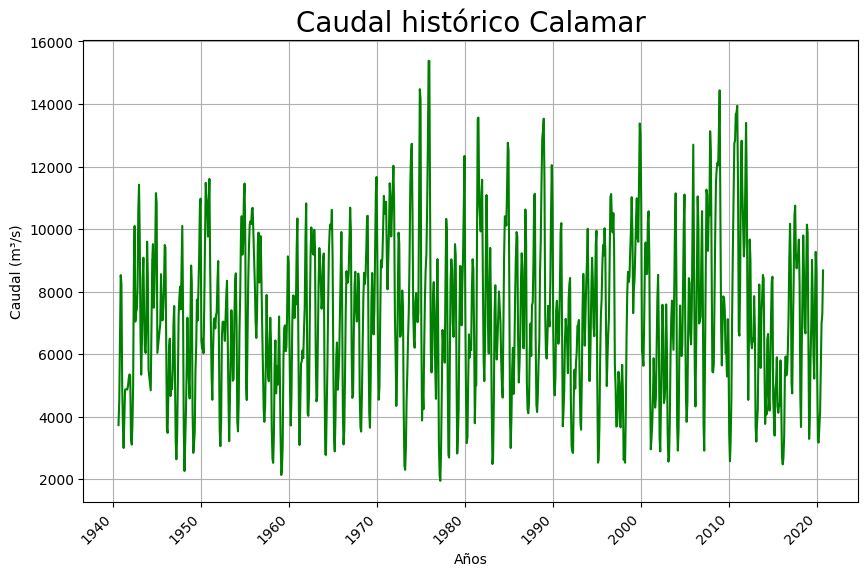

In [ ]:
# Configurar el gráfico con fechas en el eje x
plt.figure(figsize = (10,6))
plt.plot(df_caudal['fecha'], df_caudal['caudal'], color = 'green')

# Personalizar el formato de las fechas en el eje x (opcional)
plt.xticks(rotation=45, ha='right')  # Rotar las fechas para una mejor legibilidad
plt.title("Caudal histórico Calamar", fontsize = 20)
plt.xlabel("Años")
plt.ylabel("Caudal (m³/s)")
plt.grid()

# Mostrar el gráfico
plt.savefig("HistoricoCalamar")
plt.show()


7148.128789365179

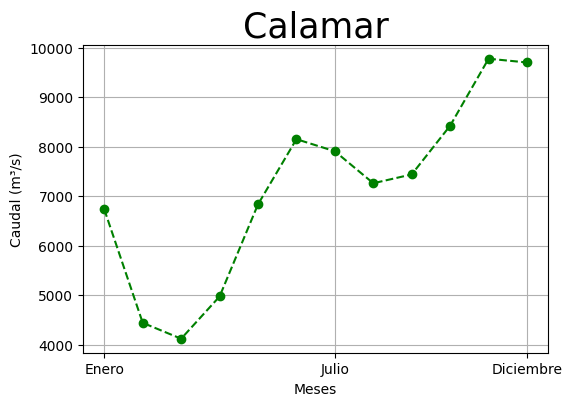

In [ ]:
CaudalCalamar = df.groupby('mes').mean().reset_index()
plt.figure(figsize = (6,4))
plt.plot(CaudalCalamar['mes'], CaudalCalamar['caudal'], marker = "o",  linestyle = "--", color = "green")
plt.title("Calamar", fontsize = 25)
plt.xlabel("Meses")
plt.ylabel("Caudal (m³/s)")
x = [1,7,12]
meses = ['Enero',  "Julio",  "Diciembre"]
plt.xticks(x, meses)
plt.grid()
plt.savefig("Calamar")
np.mean(CaudalCalamar['caudal'])

In [ ]:
df.groupby('anio').mean().reset_index()

,anio,mes,caudal
0,1940,10.0,6317.200000
1,1941,6.5,4672.416667
2,1942,6.5,7171.250000
3,1943,6.5,7518.666667
4,1944,6.5,7738.333333
...,...,...,...
76,2016,6.5,5496.786627
77,2017,6.5,8392.777102
78,2018,6.5,7592.065632
79,2019,6.5,6661.747683


7148.128789365179

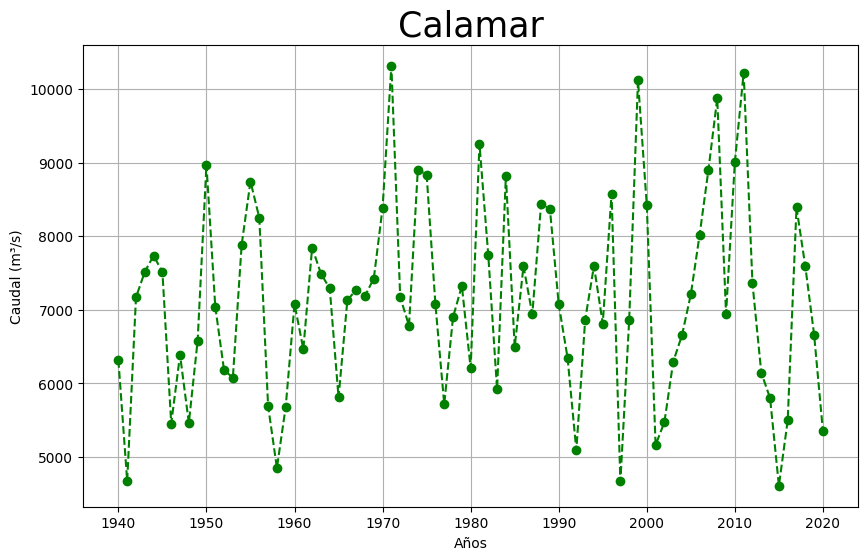

In [ ]:
CaudalCalamarAnio = df.groupby('anio').mean().reset_index()
plt.figure(figsize = (10,6))
plt.plot(CaudalCalamarAnio['anio'], CaudalCalamarAnio['caudal'], marker = "o",  linestyle = "--", color = "green")
plt.title("Calamar", fontsize = 25)
plt.xlabel("Años")
plt.ylabel("Caudal (m³/s)")
plt.grid()
plt.savefig("Calamar_anio")
np.mean(CaudalCalamar['caudal'])

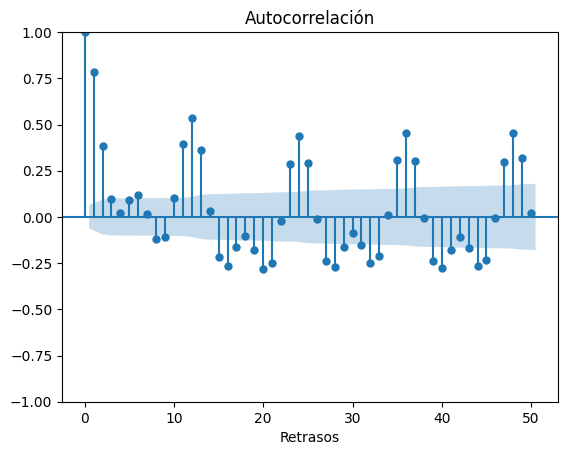

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['caudal'], lags=50)
plt.title('Autocorrelación')
plt.xlabel('Retrasos')
plt.savefig("autocorrelacion")
plt.show()


#SARIMA

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Resultados de la prueba de Dickey-Fuller para columna: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Número de observaciones utilizadas'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Rechazar la hipótesis nula")
        print("Los datos son estacionarios")
    else:
        print("Conclusion:====>")
        print("No se puede rechazar la hipótesis nula")
        print("Los datos no son estacionarios")

In [ ]:
Augmented_Dickey_Fuller_Test_func(df['caudal'], 'caudal')

Resultados de la prueba de Dickey-Fuller para columna: caudal
Test Statistic                         -4.832658
p-value                                 0.000047
No Lags Used                           22.000000
Número de observaciones utilizadas    939.000000
Critical Value (1%)                    -3.437333
Critical Value (5%)                    -2.864623
Critical Value (10%)                   -2.568412
dtype: float64
Conclusion:====>
Rechazar la hipótesis nula
Los datos son estacionarios


In [ ]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), style='bmh'): # [3]
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Gráfico de analisys de Serie de Tiempo\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

        plt.savefig('tsplot')

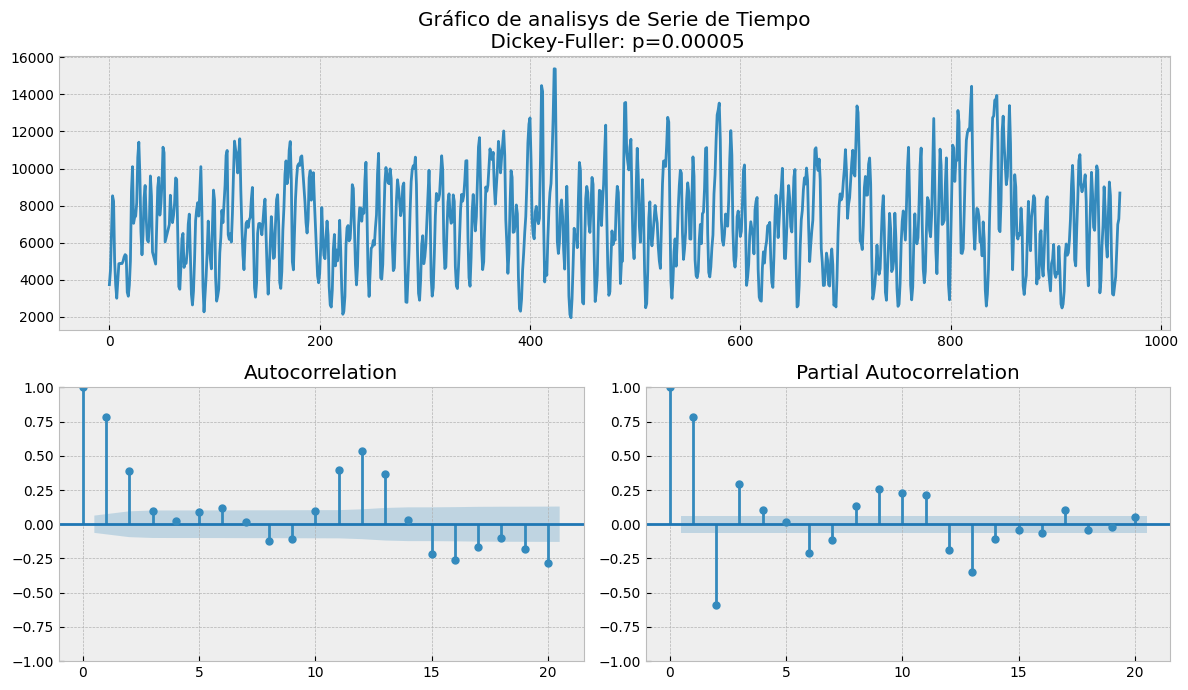

In [ ]:
tsplot(df["caudal"], lags=20)

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.1 MB/s eta 0:00:00


In [ ]:
import pmdarima as pm

# Datos de series temporales (reemplaza esto con tus propios datos)
# series = ...

# Realizar búsqueda en cuadrícula
auto_model = pm.auto_arima(merged_df['caudal'], seasonal=True, m=12, suppress_warnings=True)

# Obtener los parámetros óptimos
optimal_params = auto_model.get_params()
print(optimal_params)


{'maxiter': 50, 'method': 'lbfgs', 'order': (3, 0, 1), 'out_of_sample_size': 0, 'scoring': 'mse', 'scoring_args': {}, 'seasonal_order': (2, 0, 1, 12), 'start_params': None, 'suppress_warnings': True, 'trend': None, 'with_intercept': True}


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
merged_df_scaler = scaler.fit_transform(merged_df)
merged_df_scaler = pd.DataFrame(merged_df_scaler, columns = merged_df.columns)
merged_df_scaler

,AMMsst,BEST,NINO3,NINO34,caudal
0,0.497010,0.541463,0.368421,0.483731,0.125698
1,0.453156,0.569106,0.451128,0.553145,0.023308
2,0.519601,0.616260,0.484962,0.609544,0.094348
3,0.576744,0.533333,0.398496,0.527115,0.165388
4,0.539535,0.538211,0.389098,0.540130,0.265545
...,...,...,...,...,...
769,0.541528,0.362602,0.364662,0.340564,0.373446
770,0.308306,0.360976,0.362782,0.368764,0.192643
771,0.371429,0.486179,0.390977,0.409978,0.344925
772,0.396678,0.508943,0.392857,0.433839,0.574503


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Squared Error (MSE) en conjunto de validación: 0.02218496994536987
Mean Squared Error (MSE) en conjunto de prueba: 0.040908472434783905


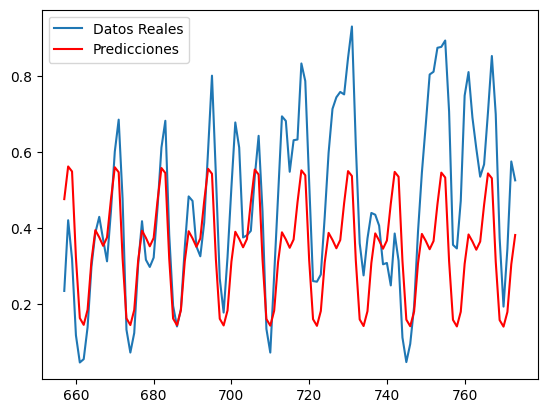

In [ ]:
from scipy.integrate import tplquad
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Supongamos que 'merged_df' es tu DataFrame con la serie temporal
# Asegúrate de tener una columna de fecha ('fecha') y la serie temporal ('caudal')

# Dividir los datos en entrenamiento, validación y prueba
train_size = int(len(merged_df['caudal']) * 0.7)
valid_size = int(len(merged_df['caudal']) * 0.15)

train, valid, test = merged_df_scaler['caudal'][:train_size], merged_df_scaler['caudal'][train_size:train_size+valid_size], merged_df_scaler['caudal'][train_size+valid_size:]

# Definir y ajustar el modelo SARIMA utilizando los datos de entrenamiento
order = optimal_params['order']  # Componentes no estacionales
seasonal_order = optimal_params['seasonal_order']  # Componentes estacionales
model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

# Realizar predicciones en el conjunto de validación
predictions = model_fit.predict(start=valid.index[0], end=valid.index[-1])

mse = mean_squared_error(valid, predictions)
print(f'Mean Squared Error (MSE) en conjunto de validación: {mse}')

# Realizar predicciones en el conjunto de prueba
test_predictions = model_fit.predict(start=test.index[0], end=test.index[-1])

test_mse = mean_squared_error(test, test_predictions)
print(f'Mean Squared Error (MSE) en conjunto de prueba: {test_mse}')

# Visualizar las predicciones y los datos reales en el conjunto de prueba
plt.plot(test, label='Datos Reales')
plt.plot(test_predictions, color='red', label='Predicciones')
plt.legend()
plt.savefig('SARIMA_1')
plt.show()




/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Squared Error (MSE) en conjunto de prueba: 0.10275022597849769


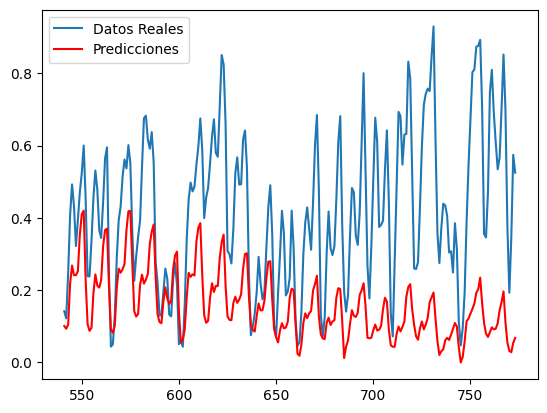

In [ ]:
train, valid = merged_df_scaler[merged_df_scaler.columns][:train_size], merged_df_scaler[merged_df_scaler.columns][train_size:]

model = SARIMAX(train['caudal'],exog=train[['AMMsst', 'BEST', 'NINO3', 'NINO34']], order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

# Realizar predicciones en el conjunto de validación
predictions = model_fit.predict(start = valid.index[0], end = valid.index[-1], exog=valid[['AMMsst', 'BEST', 'NINO3', 'NINO34']])

mse = mean_squared_error(valid['caudal'], predictions)
print(f'Mean Squared Error (MSE) en conjunto de prueba: {mse}')

# Visualizar las predicciones y los datos reales en el conjunto de prueba
plt.plot(valid['caudal'], label='Datos Reales')
plt.plot(predictions, color='red', label='Predicciones')
plt.legend()
plt.savefig('SARIMA_2')
plt.show()



#LSTM

In [ ]:
def particion(data, tr_size=0.8, vl_size=0.1, ts_size=0.1 ):

    N = data.shape[0]
    Ntrain = int(tr_size*N)  # Número de datos de entrenamiento
    Nval = int(vl_size*N)    # Número de datos de validación
    Ntst = N - Ntrain - Nval # Número de datos de prueba

    # Realizar partición
    train = data[0:Ntrain]
    val = data[Ntrain:Ntrain+Nval]
    test = data[Ntrain+Nval:]

    return train, val, test

In [ ]:
tr, vl, ts = particion(merged_df)

In [ ]:
# Crear los datasets de entrenamiento, prueba y validación y verificar sus tamaños
long_entrada = 36    # Posteriormente afinaremos este hiperparámetro
long_salida = 1    # Modelo uni-step

def crear_dataset_supervisado(array, input_length, output_length):
    '''Permite crear un dataset con las entradas (X) y salidas (Y)
    requeridas por la Red LSTM.

    Parámetros:
    - array: arreglo numpy de tamaño N x features (N: cantidad de datos,
      f: cantidad de features)
    - input_length: instantes de tiempo consecutivos de la(s) serie(s) de tiempo
      usados para alimentar el modelo
    - output_length: instantes de tiempo a pronosticar (salida del modelo)
    '''

    # Inicialización
    X, Y = [], []    # Listados que contendrán los datos de entrada y salida del modelo
    shape = array.shape
    if len(shape)==1: # Si tenemos sólo una serie (univariado)
        fils, cols = array.shape[0], 1
        array = array.reshape(fils,cols)
    else: # Multivariado
        fils, cols = array.shape

    # Generar los arreglos
    for i in range(fils-input_length-output_length):
        X.append(array[i:i+long_entrada,0:cols])
        Y.append(array[i+input_length:i+input_length+output_length,-1].reshape(output_length,1))

    # Convertir listas a arreglos de NumPy
    X = np.array(X)
    Y = np.array(Y)

    return X, Y

In [ ]:
x_tr, y_tr = crear_dataset_supervisado(tr.values, long_entrada, long_salida)
x_vl, y_vl = crear_dataset_supervisado(vl.values, long_entrada, long_salida)
x_ts, y_ts = crear_dataset_supervisado(ts.values, long_entrada, long_salida)

# Imprimir información en pantalla
print('Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)')
print(f'Set de entrenamiento - x_tr: {x_tr.shape}, y_tr: {y_tr.shape}')
print(f'Set de validación - x_vl: {x_vl.shape}, y_vl: {y_vl.shape}')
print(f'Set de prueba - x_ts: {x_ts.shape}, y_ts: {y_ts.shape}')

Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)
Set de entrenamiento - x_tr: (582, 36, 5), y_tr: (582, 1, 1)
Set de validación - x_vl: (40, 36, 5), y_vl: (40, 1, 1)
Set de prueba - x_ts: (41, 36, 5), y_ts: (41, 1, 1)


In [ ]:
def escalar_dataset(data_input, col_ref):
    '''Escala el dataset en el rango de -1 a 1.

    Entradas:
    - data_input: diccionario con los dataset de entrada y salida del modelo
    (data_input = {'x_tr':x_tr, 'y_tr':y_tr, 'x_vl':x_vl, 'y_vl':y_vl,
                    'y_ts':y_ts})
    - col_ref: parámetro adicional para especificar la columna que contiene
      la variable a predecir


    Retorna:
    - data_scaled: diccionario con los datasets de entrada y salida escalados
      (tiene la misma estructura del diccionario de entrada)
    - scaler: el escalador usado (requerido para las predicciones)
    '''

    # *** Implementación adicional: determinar el índice de la columna
    # que contiene la variable a predecir
    col_ref = df.columns.get_loc(col_ref)

    # Número de instantes de tiempo de entrada y de covariables
    NFEATS = data_input['x_tr'].shape[2]

    # Generar listado con "scalers" (1 por cada covariable de entrada)
    scalers = [MinMaxScaler(feature_range=(-1,1)) for i in range(NFEATS)]

    # Arreglos que contendrán los datasets escalados
    x_tr_s = np.zeros(data_input['x_tr'].shape)
    x_vl_s = np.zeros(data_input['x_vl'].shape)
    x_ts_s = np.zeros(data_input['x_ts'].shape)
    y_tr_s = np.zeros(data_input['y_tr'].shape)
    y_vl_s = np.zeros(data_input['y_vl'].shape)
    y_ts_s = np.zeros(data_input['y_ts'].shape)

    # Escalamiento: se usarán los min/max del set de entrenamiento para
    # escalar la totalidad de los datasets

    # Escalamiento Xs
    for i in range(NFEATS):
        x_tr_s[:,:,i] = scalers[i].fit_transform(x_tr[:,:,i])
        x_vl_s[:,:,i] = scalers[i].transform(x_vl[:,:,i])
        x_ts_s[:,:,i] = scalers[i].transform(x_ts[:,:,i])

    # Escalamiento Ys (teniendo en cuenta "col_ind")
    y_tr_s[:,:,0] = scalers[col_ref].fit_transform(y_tr[:,:,0])
    y_vl_s[:,:,0] = scalers[col_ref].transform(y_vl[:,:,0])
    y_ts_s[:,:,0] = scalers[col_ref].transform(y_ts[:,:,0])

    # Conformar diccionario de salida
    data_scaled = {
        'x_tr_s': x_tr_s, 'y_tr_s': y_tr_s,
        'x_vl_s': x_vl_s, 'y_vl_s': y_vl_s,
        'x_ts_s': x_ts_s, 'y_ts_s': y_ts_s,
    }

    return data_scaled, scalers[col_ref]

In [ ]:
# Escalamiento del dataset con la función anterior

# Crear diccionario de entrada
data_in = {
    'x_tr': x_tr, 'y_tr': y_tr,
    'x_vl': x_vl, 'y_vl': y_vl,
    'x_ts': x_ts, 'y_ts': y_ts,
}

# Y escalar (especificando la columna con la variable a predecir)
data_s, scaler = escalar_dataset(data_in, col_ref = 'caudal' )

# Extraer subsets escalados
x_tr_s, y_tr_s = data_s['x_tr_s'], data_s['y_tr_s']
x_vl_s, y_vl_s = data_s['x_vl_s'], data_s['y_vl_s']
x_ts_s, y_ts_s = data_s['x_ts_s'], data_s['y_ts_s']

##Primera Iteración

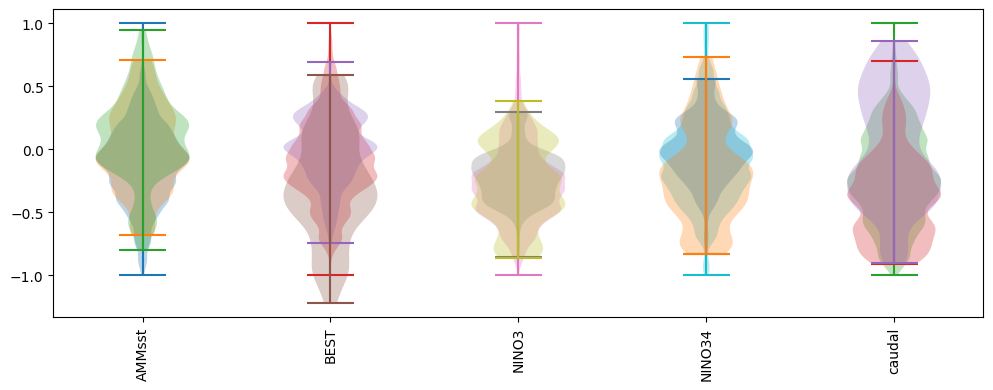

In [ ]:
# Y generemos una gráfica tipo violín para ver la distribución
# de los valores en cada covariable (entrada) y en la variable a
# predecir (salida)

fig, ax = plt.subplots(figsize=(12,4))
for i in range(5):
    ax.violinplot(dataset=x_tr_s[:,:,i].flatten(), positions=[i])
    ax.violinplot(dataset=x_vl_s[:,:,i].flatten(), positions=[i])
    ax.violinplot(dataset=x_ts_s[:,:,i].flatten(), positions=[i])

# Etiquetas eje horizontal
ax.set_xticks(list(range(5)))
ax.set_xticklabels(merged_df.keys(), rotation=90)
ax.autoscale()
plt.savefig('violin')

In [ ]:
# Pérdida: se usará el RMSE (root mean squared error) para el entrenamiento
# pues permite tener errores en las mismas unidades de la temperatura
def root_mean_squared_error(y_true, y_pred):
    rmse = tf.math.sqrt(tf.math.reduce_mean(tf.square(y_pred-y_true)))
    return rmse

In [ ]:
# Creación del modelo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop, Adam
import tensorflow as tf
import random

seed = 42

# Ajustar parámetros para reproducibilidad del entrenamiento
tf.random.set_seed(seed)
tf.config.experimental.enable_op_determinism()

random.seed(seed)
np.random.seed(seed)

# El modelo
N_UNITS = 128 # Tamaño del estado oculto (h) y de la celdad de memoria (c) (128)
INPUT_SHAPE = (x_tr_s.shape[1], x_tr_s.shape[2]) # 24 (horas) x 13 (features)

modelo = Sequential()
modelo.add(LSTM(N_UNITS, input_shape=INPUT_SHAPE))

# Y lo único que cambia con respecto al modelo multivariado + uni-step es
# el tamaño deldato de salida
modelo.add(Dense(long_salida, activation='linear')) # activation = 'linear' pues queremos pronosticar (regresión)

# Compilación
optimizador = RMSprop(learning_rate=5e-4) # 5e-5
modelo.compile(
    optimizer = optimizador,
    loss = root_mean_squared_error,
)

# Entrenamiento (aproximadamente 1 min usando GPU)
EPOCHS = 80 # Hiperparámetro
BATCH_SIZE = 256 # Hiperparámetro
historia = modelo.fit(
    x = x_tr_s,
    y = y_tr_s,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_data = (x_vl_s, y_vl_s),
    verbose=2
)

Epoch 1/80
3/3 - 3s - loss: 0.4210 - val_loss: 0.3683 - 3s/epoch - 1s/step
Epoch 2/80
3/3 - 0s - loss: 0.3590 - val_loss: 0.3231 - 408ms/epoch - 136ms/step
Epoch 3/80
3/3 - 0s - loss: 0.3441 - val_loss: 0.3165 - 371ms/epoch - 124ms/step
Epoch 4/80
3/3 - 0s - loss: 0.3418 - val_loss: 0.3154 - 341ms/epoch - 114ms/step
Epoch 5/80
3/3 - 0s - loss: 0.3375 - val_loss: 0.3104 - 417ms/epoch - 139ms/step
Epoch 6/80
3/3 - 0s - loss: 0.3377 - val_loss: 0.3257 - 361ms/epoch - 120ms/step
Epoch 7/80
3/3 - 0s - loss: 0.3383 - val_loss: 0.3101 - 388ms/epoch - 129ms/step
Epoch 8/80
3/3 - 0s - loss: 0.3312 - val_loss: 0.3111 - 399ms/epoch - 133ms/step
Epoch 9/80
3/3 - 0s - loss: 0.3288 - val_loss: 0.3033 - 391ms/epoch - 130ms/step
Epoch 10/80
3/3 - 0s - loss: 0.3272 - val_loss: 0.3208 - 392ms/epoch - 131ms/step
Epoch 11/80
3/3 - 0s - loss: 0.3305 - val_loss: 0.3016 - 386ms/epoch - 129ms/step
Epoch 12/80
3/3 - 0s - loss: 0.3250 - val_loss: 0.3029 - 373ms/epoch - 124ms/step
Epoch 13/80
3/3 - 0s - loss: 0.

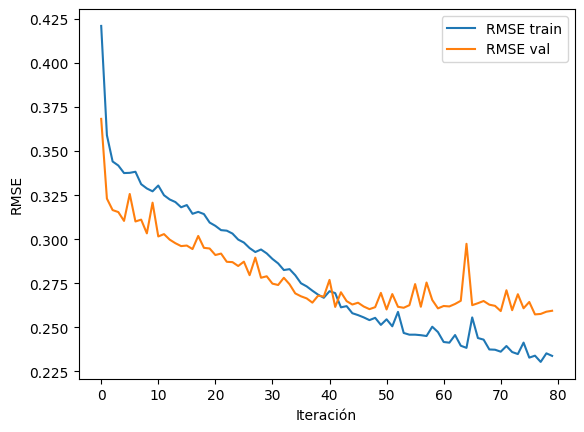

In [ ]:
 # Graficar curvas de entrenamiento y validación
 # para verificar que no existe overfitting
plt.plot(historia.history['loss'],label='RMSE train')
plt.plot(historia.history['val_loss'],label='RMSE val')
plt.xlabel('Iteración')
plt.ylabel('RMSE')
plt.legend()
plt.savefig('LSTM_1')

In [ ]:
# Cálculo de rmses para train, val y test
rmse_tr = modelo.evaluate(x=x_tr_s, y=y_tr_s, verbose=0)
rmse_vl = modelo.evaluate(x=x_vl_s, y=y_vl_s, verbose=0)
rmse_ts = modelo.evaluate(x=x_ts_s, y=y_ts_s, verbose=0)

# Imprimir resultados en pantalla
print('Comparativo desempeños:')
print(f'  RMSE train:\t {rmse_tr:.3f}')
print(f'  RMSE val:\t {rmse_vl:.3f}')
print(f'  RMSE test:\t {rmse_ts:.3f}')

Comparativo desempeños:
  RMSE train:	 0.233
  RMSE val:	 0.259
  RMSE test:	 0.309


In [ ]:
def predecir(x, model, scaler):
    '''Genera la predicción de OUTPUT_LENGTH instantes
    de tiempo a futuro con el modelo entrenado.

    Entrada:
    - x: batch (o batches) de datos para ingresar al modelo
      (tamaño: BATCHES X INPUT_LENGTH X FEATURES)
    - model: Red LSTM entrenada
    - scaler: escalador (requerido para llevar la predicción a la escala original)

    Salida:
    - y_pred: la predicción en la escala original (tamaño: BATCHES X OUTPUT_LENGTH X FEATURES)
    '''

    # Calcular predicción escalada en el rango de -1 a 1
    y_pred_s = model.predict(x,verbose=0)

    # Llevar la predicción a la escala original
    y_pred = scaler.inverse_transform(y_pred_s)

    return y_pred.flatten()

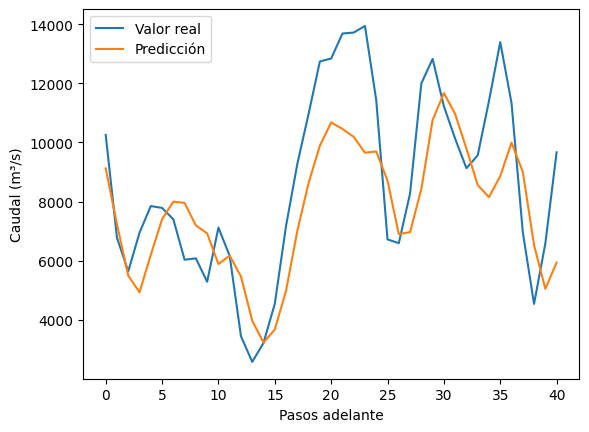

In [ ]:
# Calcular predicciones sobre el set de prueba
y_ts_pred = predecir(x_ts_s, modelo, scaler)
N = len(y_ts_pred)    # Número de predicciones

plt.plot(range(N), y_ts.flatten(), label='Valor real')
plt.plot(range(N), y_ts_pred, label='Predicción')
plt.xlabel("Pasos adelante")
plt.ylabel("Caudal (m³/s)")
plt.legend()
plt.savefig('LSTM1_pred')
plt.show()

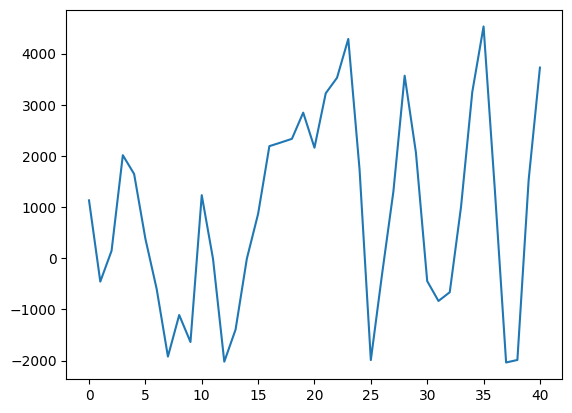

In [ ]:
N = len(y_ts_pred)    # Número de predicciones
ndato = np.linspace(1,N,N)

# Cálculo de errores simples
errores = y_ts.flatten()-y_ts_pred
plt.plot(errores);

##Segunda Iteración

In [ ]:
# Creación del modelo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop, Adam
import tensorflow as tf
import random

seed = 42

# Ajustar parámetros para reproducibilidad del entrenamiento
tf.random.set_seed(seed)
tf.config.experimental.enable_op_determinism()

random.seed(seed)
np.random.seed(seed)

# El modelo
N_UNITS = 128 # Tamaño del estado oculto (h) y de la celdad de memoria (c) (128)
INPUT_SHAPE = (x_tr_s.shape[1], x_tr_s.shape[2]) # 24 (horas) x 13 (features)

modelo = Sequential()
modelo.add(LSTM(N_UNITS, input_shape=INPUT_SHAPE))

# Y lo único que cambia con respecto al modelo multivariado + uni-step es
# el tamaño deldato de salida
modelo.add(Dense(long_salida, activation='linear')) # activation = 'linear' pues queremos pronosticar (regresión)

# Pérdida: se usará el RMSE (root mean squared error) para el entrenamiento
# pues permite tener errores en las mismas unidades de la temperatura

# Compilación
optimizador = RMSprop(learning_rate=5e-5) # 5e-5
modelo.compile(
    optimizer = optimizador,
    loss = root_mean_squared_error,
)

# Entrenamiento (aproximadamente 1 min usando GPU)
EPOCHS = 100 # Hiperparámetro
BATCH_SIZE = 300 # Hiperparámetro
historia = modelo.fit(
    x = x_tr_s,
    y = y_tr_s,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_data = (x_vl_s, y_vl_s),
    verbose=2
)

Epoch 1/100
2/2 - 3s - loss: 0.4457 - val_loss: 0.4789 - 3s/epoch - 2s/step
Epoch 2/100
2/2 - 0s - loss: 0.4385 - val_loss: 0.4720 - 389ms/epoch - 194ms/step
Epoch 3/100
2/2 - 0s - loss: 0.4334 - val_loss: 0.4663 - 341ms/epoch - 170ms/step
Epoch 4/100
2/2 - 0s - loss: 0.4287 - val_loss: 0.4613 - 365ms/epoch - 183ms/step
Epoch 5/100
2/2 - 0s - loss: 0.4255 - val_loss: 0.4567 - 316ms/epoch - 158ms/step
Epoch 6/100
2/2 - 0s - loss: 0.4220 - val_loss: 0.4521 - 419ms/epoch - 209ms/step
Epoch 7/100
2/2 - 1s - loss: 0.4187 - val_loss: 0.4479 - 575ms/epoch - 288ms/step
Epoch 8/100
2/2 - 1s - loss: 0.4156 - val_loss: 0.4438 - 584ms/epoch - 292ms/step
Epoch 9/100
2/2 - 1s - loss: 0.4127 - val_loss: 0.4398 - 566ms/epoch - 283ms/step
Epoch 10/100
2/2 - 1s - loss: 0.4098 - val_loss: 0.4358 - 572ms/epoch - 286ms/step
Epoch 11/100
2/2 - 1s - loss: 0.4067 - val_loss: 0.4319 - 578ms/epoch - 289ms/step
Epoch 12/100
2/2 - 1s - loss: 0.4042 - val_loss: 0.4281 - 560ms/epoch - 280ms/step
Epoch 13/100
2/2 - 

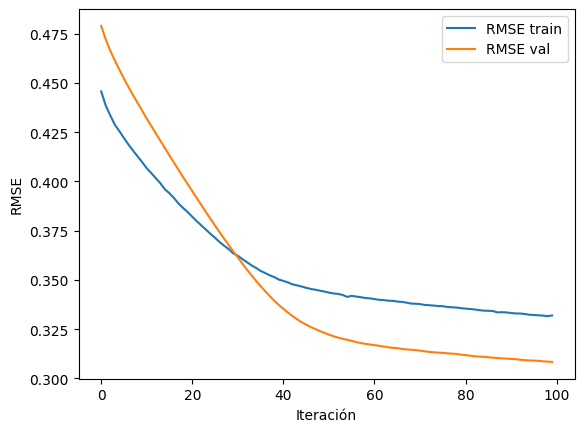

In [ ]:
 # Graficar curvas de entrenamiento y validación
 # para verificar que no existe overfitting
plt.plot(historia.history['loss'],label='RMSE train')
plt.plot(historia.history['val_loss'],label='RMSE val')
plt.xlabel('Iteración')
plt.ylabel('RMSE')
plt.legend()
plt.savefig('LSTM_2')
plt.show()

In [ ]:
# Cálculo de rmses para train, val y test
rmse_tr = modelo.evaluate(x=x_tr_s, y=y_tr_s, verbose=0)
rmse_vl = modelo.evaluate(x=x_vl_s, y=y_vl_s, verbose=0)
rmse_ts = modelo.evaluate(x=x_ts_s, y=y_ts_s, verbose=0)

# Imprimir resultados en pantalla
print('Comparativo desempeños:')
print(f'  RMSE train:\t {rmse_tr:.3f}')
print(f'  RMSE val:\t {rmse_vl:.3f}')
print(f'  RMSE test:\t {rmse_ts:.3f}')

Comparativo desempeños:
  RMSE train:	 0.327
  RMSE val:	 0.305
  RMSE test:	 0.395


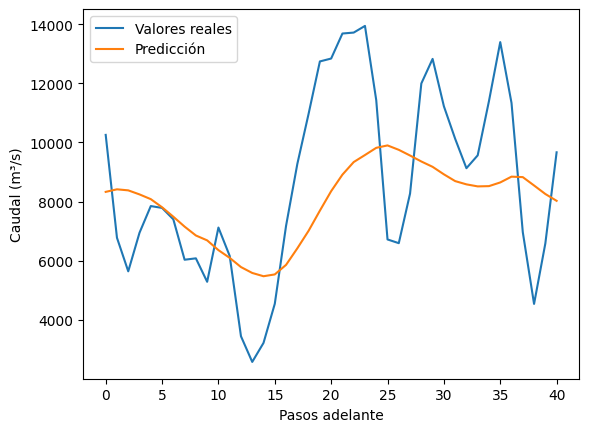

In [ ]:
# Calcular predicciones sobre el set de prueba
y_ts_pred = predecir(x_ts_s, modelo, scaler)
N = len(y_ts_pred)    # Número de predicciones

plt.plot(range(N), y_ts.flatten(), label = 'Valores reales')
plt.plot(range(N), y_ts_pred, label = 'Predicción')
plt.xlabel("Pasos adelante")
plt.ylabel("Caudal (m³/s)")
plt.legend()
plt.savefig('LSTM2_pred')
plt.show()

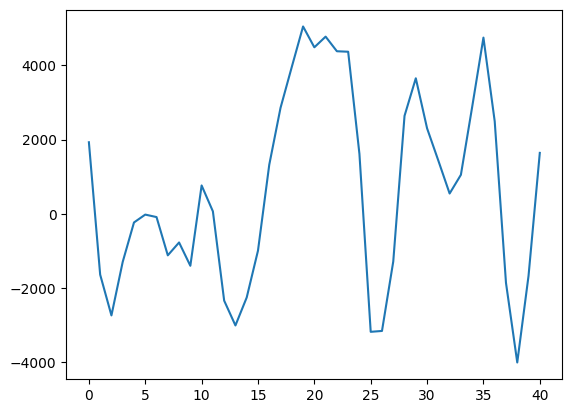

In [ ]:
ndato = np.linspace(1,N,N)

# Cálculo de errores simples
errores = y_ts.flatten()-y_ts_pred
plt.plot(errores);

##Tercera Iteración

In [ ]:
NFEATS = 'caudal'
tr, vl, ts = particion(merged_df['caudal'])

# Imprimir en pantalla el tamaño de cada subset
print(f'Tamaño set de entrenamiento: {tr.shape}')
print(f'Tamaño set de validación: {vl.shape}')
print(f'Tamaño set de prueba: {ts.shape}')

Tamaño set de entrenamiento: (619,)
Tamaño set de validación: (77,)
Tamaño set de prueba: (78,)


In [ ]:
# Definición de los hiperparámetros INPUT_LENGTH y OUTPUT_LENGTH
long_entrada = 24    # Registros de 24 horas consecutivas a la entrada
long_salida = 1    # El modelo va a predecir 1 hora a futuro

# Datasets supervisados para entrenamiento (x_tr, y_tr), validación
# (x_vl, y_vl) y prueba (x_ts, y_ts)
x_tr, y_tr = crear_dataset_supervisado(tr.values, long_entrada, long_salida)
x_vl, y_vl = crear_dataset_supervisado(vl.values, long_entrada, long_salida)
x_ts, y_ts = crear_dataset_supervisado(ts.values, long_entrada, long_salida)

In [ ]:
print('Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)')
print(f'Set de entrenamiento - x_tr: {x_tr.shape}, y_tr: {y_tr.shape}')
print(f'Set de validación - x_vl: {x_vl.shape}, y_vl: {y_vl.shape}')
print(f'Set de prueba - x_ts: {x_ts.shape}, y_ts: {y_ts.shape}')

Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)
Set de entrenamiento - x_tr: (594, 24, 1), y_tr: (594, 1, 1)
Set de validación - x_vl: (52, 24, 1), y_vl: (52, 1, 1)
Set de prueba - x_ts: (53, 24, 1), y_ts: (53, 1, 1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

def escalar_dataset(data_input):
    NFEATS = data_input['x_tr'].shape[2]

    # Generar listado con "scalers"
    scalers = [MinMaxScaler(feature_range=(-1,1)) for i in range(NFEATS)]

    # Arreglos que contendrán los datasets escalados
    x_tr_s = np.zeros(data_input['x_tr'].shape)
    x_vl_s = np.zeros(data_input['x_vl'].shape)
    x_ts_s = np.zeros(data_input['x_ts'].shape)
    y_tr_s = np.zeros(data_input['y_tr'].shape)
    y_vl_s = np.zeros(data_input['y_vl'].shape)
    y_ts_s = np.zeros(data_input['y_ts'].shape)

    # Escalamiento: se usarán los min/max del set de entrenamiento para
    # escalar la totalidad de los datasets

    # Escalamiento Xs
    for i in range(NFEATS):
        x_tr_s[:,:,i] = scalers[i].fit_transform(x_tr[:,:,i])
        x_vl_s[:,:,i] = scalers[i].transform(x_vl[:,:,i])
        x_ts_s[:,:,i] = scalers[i].transform(x_ts[:,:,i])

    # Escalamiento Ys
    y_tr_s[:,:,0] = scalers[-1].fit_transform(y_tr[:,:,0])
    y_vl_s[:,:,0] = scalers[-1].transform(y_vl[:,:,0])
    y_ts_s[:,:,0] = scalers[-1].transform(y_ts[:,:,0])

    # Conformar ` de salida
    data_scaled = {
        'x_tr_s': x_tr_s, 'y_tr_s': y_tr_s,
        'x_vl_s': x_vl_s, 'y_vl_s': y_vl_s,
        'x_ts_s': x_ts_s, 'y_ts_s': y_ts_s,
    }

    return data_scaled, scalers[0]

In [ ]:
data_in = {
    'x_tr': x_tr, 'y_tr': y_tr,
    'x_vl': x_vl, 'y_vl': y_vl,
    'x_ts': x_ts, 'y_ts': y_ts,
}

data_s, scaler = escalar_dataset(data_in)

#data_s, scaler = escalar_dataset(data_in)

x_tr_s, y_tr_s = data_s['x_tr_s'], data_s['y_tr_s']
x_vl_s, y_vl_s = data_s['x_vl_s'], data_s['y_vl_s']
x_ts_s, y_ts_s = data_s['x_ts_s'], data_s['y_ts_s']

In [ ]:
tf.random.set_seed(123)

N_UNITS = 128
INPUT_SHAPE = (x_tr_s.shape[1], x_tr_s.shape[2])

modelo = Sequential()
modelo.add(LSTM(N_UNITS, input_shape=INPUT_SHAPE))
modelo.add(Dense(long_salida, activation='linear'))

optimizador = RMSprop(learning_rate=5e-5)

modelo.compile(
    optimizer = optimizador,
    loss = root_mean_squared_error,
)

EPOCHS = 80
BATCH_SIZE = 256

historia = modelo.fit(
    x = x_tr_s,
    y = y_tr_s,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_data = (x_vl_s, y_vl_s),
    verbose=2
)


Epoch 1/80
3/3 - 4s - loss: 0.4292 - val_loss: 0.4710 - 4s/epoch - 1s/step
Epoch 2/80
3/3 - 0s - loss: 0.4220 - val_loss: 0.4604 - 306ms/epoch - 102ms/step
Epoch 3/80
3/3 - 0s - loss: 0.4174 - val_loss: 0.4527 - 273ms/epoch - 91ms/step
Epoch 4/80
3/3 - 0s - loss: 0.4138 - val_loss: 0.4452 - 294ms/epoch - 98ms/step
Epoch 5/80
3/3 - 0s - loss: 0.4101 - val_loss: 0.4378 - 272ms/epoch - 91ms/step
Epoch 6/80
3/3 - 0s - loss: 0.4067 - val_loss: 0.4309 - 310ms/epoch - 103ms/step
Epoch 7/80
3/3 - 0s - loss: 0.4039 - val_loss: 0.4246 - 286ms/epoch - 95ms/step
Epoch 8/80
3/3 - 0s - loss: 0.4010 - val_loss: 0.4189 - 301ms/epoch - 100ms/step
Epoch 9/80
3/3 - 0s - loss: 0.3985 - val_loss: 0.4134 - 297ms/epoch - 99ms/step
Epoch 10/80
3/3 - 0s - loss: 0.3959 - val_loss: 0.4086 - 272ms/epoch - 91ms/step
Epoch 11/80
3/3 - 0s - loss: 0.3938 - val_loss: 0.4026 - 327ms/epoch - 109ms/step
Epoch 12/80
3/3 - 0s - loss: 0.3911 - val_loss: 0.3979 - 308ms/epoch - 103ms/step
Epoch 13/80
3/3 - 0s - loss: 0.3894 -

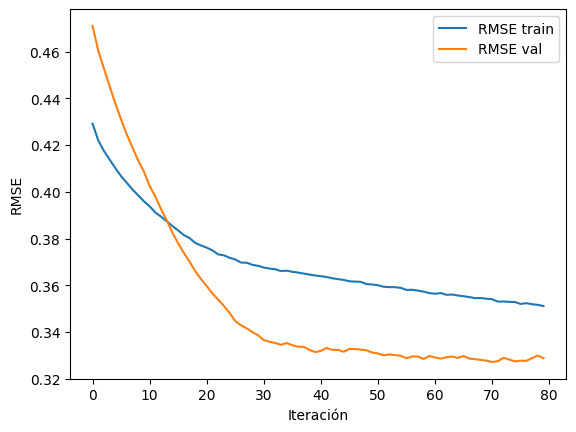

In [ ]:
# Graficar curvas de entrenamiento y validación
# para verificar que no existe overfitting
plt.plot(historia.history['loss'],label='RMSE train')
plt.plot(historia.history['val_loss'],label='RMSE val')
plt.xlabel('Iteración')
plt.ylabel('RMSE')
plt.legend()
plt.savefig('LSTM_3')
plt.show()

In [ ]:
rmse_tr = modelo.evaluate(x=x_tr_s, y=y_tr_s, verbose=0)
rmse_vl = modelo.evaluate(x=x_vl_s, y=y_vl_s, verbose=0)
rmse_ts = modelo.evaluate(x=x_ts_s, y=y_ts_s, verbose=0)

print('Comparativo desempeños:')
print(f'  RMSE train:\t {rmse_tr:.3f}')
print(f'  RMSE val:\t {rmse_vl:.3f}')
print(f'  RMSE test:\t {rmse_ts:.3f}')

Comparativo desempeños:
  RMSE train:	 0.348
  RMSE val:	 0.328
  RMSE test:	 0.471


In [ ]:
def predecir(x, model, scaler):
    # Calcular predicción escalada en el rango de -1 a 1
    y_pred_s = model.predict(x,verbose=0)

    # Llevar la predicción a la escala original
    y_pred = scaler.inverse_transform(y_pred_s)

    return y_pred.flatten()

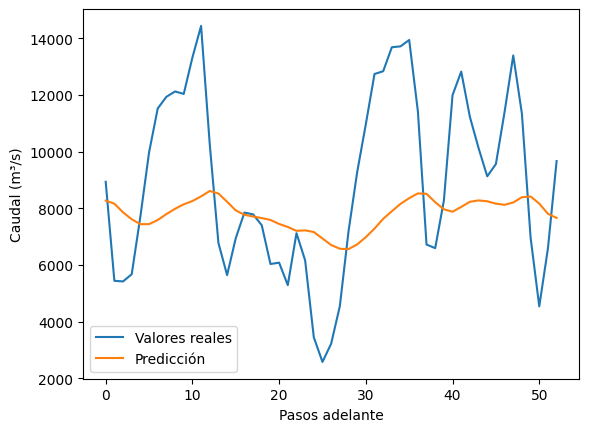

In [ ]:
# Calcular predicciones sobre el set de prueba
y_ts_pred = predecir(x_ts_s, modelo, scaler)
N = len(y_ts_pred)    # Número de predicciones

plt.plot(range(N), y_ts.flatten(), label = 'Valores reales')
plt.plot(range(N), y_ts_pred, label = 'Predicción')
plt.xlabel("Pasos adelante")
plt.ylabel("Caudal (m³/s)")
plt.legend()
plt.savefig('LSTM3_pred')
plt.show()

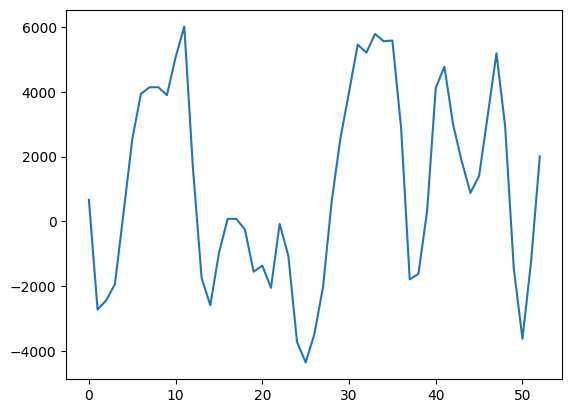

In [ ]:
y_ts_pred = predecir(x_ts_s, modelo, scaler)
N = len(y_ts_pred)    # Número de predicciones (tamaño del set de prueba)
ndato = np.linspace(1,N,N)

# Cálculo de errores simples
errores = y_ts.flatten()-y_ts_pred
plt.plot(errores)

#GRU

##Primera Iteración

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential()

# Agregar la primera capa GRU con 64 unidades y función de activación 'tanh'
model.add(tf.keras.layers.GRU(64, activation='tanh', return_sequences=True, input_shape=INPUT_SHAPE))

# Agregar capas GRU adicionales según sea necesario
model.add(tf.keras.layers.GRU(32, activation='tanh', return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(tf.keras.layers.GRU(16, activation='tanh', return_sequences=False, kernel_regularizer=tf.keras.regularizers.l2(0.01)))  # La última capa no necesita return_sequences=False

# Agregar una capa de salida, por ejemplo, una capa densa para la predicción
#model.add(tf.keras.layers.Dense(1))
model.add(Dense(long_salida, activation='linear'))


# Compilar el modelo con un optimizador y una tasa de aprendizaje específica
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(x_tr_s, y_tr_s, epochs=80, batch_size=256, validation_data=(x_vl_s, y_vl_s))

# Evaluar el modelo en el conjunto de prueba
loss = model.evaluate(x_ts_s, y_ts_s)
print(f'Pérdida en el conjunto de prueba: {loss}')

# Hacer predicciones en nuevos datos
predictions = model.predict(x_ts_s)


Epoch 1/80
3/3 [==============================] - 9s 688ms/step - loss: 1.3016 - val_loss: 1.2314
Epoch 2/80
3/3 [==============================] - 0s 90ms/step - loss: 1.2210 - val_loss: 1.1621
Epoch 3/80
3/3 [==============================] - 0s 100ms/step - loss: 1.1832 - val_loss: 1.1191
Epoch 4/80
3/3 [==============================] - 0s 88ms/step - loss: 1.1393 - val_loss: 1.0785
Epoch 5/80
3/3 [==============================] - 0s 85ms/step - loss: 1.0925 - val_loss: 1.0462
Epoch 6/80
3/3 [==============================] - 0s 87ms/step - loss: 1.0506 - val_loss: 1.0142
Epoch 7/80
3/3 [==============================] - 0s 92ms/step - loss: 1.0117 - val_loss: 0.9771
Epoch 8/80
3/3 [==============================] - 0s 82ms/step - loss: 0.9734 - val_loss: 0.9369
Epoch 9/80
3/3 [==============================] - 0s 82ms/step - loss: 0.9361 - val_loss: 0.8982
Epoch 10/80
3/3 [==============================] - 0s 102ms/step - loss: 0.9005 - val_loss: 0.8628
Epoch 11/80
3/3 [=========

2/2 [==============================] - 1s 17ms/step


In [ ]:
# Cálculo de rmses para train, val y test
rmse_tr = model.evaluate(x=x_tr_s, y=y_tr_s, verbose=0)
rmse_vl = model.evaluate(x=x_vl_s, y=y_vl_s, verbose=0)
rmse_ts = model.evaluate(x=x_ts_s, y=y_ts_s, verbose=0)

# Imprimir resultados en pantalla
print('Comparativo desempeños:')
print(f'  RMSE train:\t {rmse_tr:.3f}')
print(f'  RMSE val:\t {rmse_vl:.3f}')
print(f'  RMSE test:\t {rmse_ts:.3f}')

Comparativo desempeños:
  RMSE train:	 0.063
  RMSE val:	 0.060
  RMSE test:	 0.083


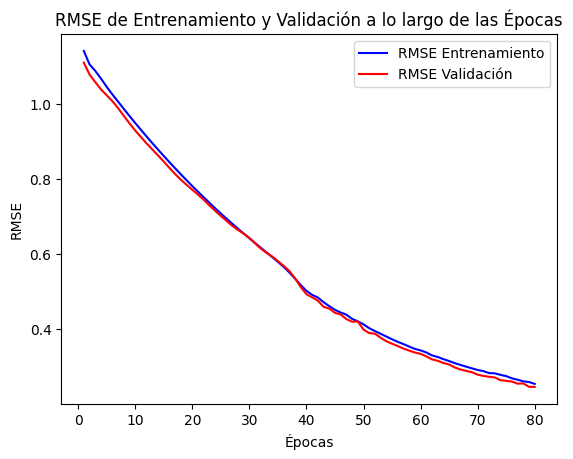

In [ ]:
# Obtener las pérdidas del historial
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Calcular el RMSE para entrenamiento y validación
train_rmse = np.sqrt(train_loss)
val_rmse = np.sqrt(val_loss)

# Crear la gráfica
epochs = range(1, len(train_rmse) + 1)

plt.plot(epochs, train_rmse, 'b', label='RMSE Entrenamiento')
plt.plot(epochs, val_rmse, 'r', label='RMSE Validación')
plt.title('RMSE de Entrenamiento y Validación a lo largo de las Épocas')
plt.xlabel('Épocas')
plt.ylabel('RMSE')
plt.legend()
plt.savefig('GRU_1')
plt.show()

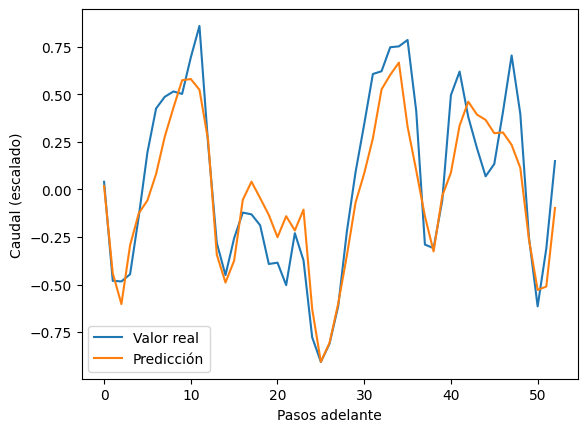

In [ ]:
N = len(predictions.flatten())    # Número de predicciones

plt.plot(range(N), y_ts_s.flatten(), label='Valor real')
plt.plot(range(N), predictions.flatten(), label='Predicción')
plt.xlabel("Pasos adelante")
plt.ylabel("Caudal (escalado)")
plt.legend()
plt.savefig('GRU1_pred')
plt.show()

##Segunda Iteración

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential()

# Agregar la primera capa GRU con 64 unidades y función de activación 'relu'
model.add(tf.keras.layers.GRU(64, activation='relu', return_sequences=True, input_shape=INPUT_SHAPE))

# Agregar capas GRU adicionales según sea necesario
model.add(tf.keras.layers.GRU(32, activation='relu', return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.0001)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.GRU(16, activation='relu', return_sequences=False, kernel_regularizer=tf.keras.regularizers.l2(0.0001)))  # La última capa no necesita return_sequences=False
model.add(tf.keras.layers.Dropout(0.2))

# Agregar una capa de salida, por ejemplo, una capa densa para la predicción
model.add(Dense(long_salida, activation='linear'))

# Compilar el modelo
model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.0001), loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(x_tr_s, y_tr_s, epochs=80, batch_size=256, validation_data=(x_vl_s, y_vl_s))

# Evaluar el modelo en el conjunto de prueba
loss = model.evaluate(x_ts_s, y_ts_s)
print(f'Pérdida en el conjunto de prueba: {loss}')

# Hacer predicciones en nuevos datos
predictions = model.predict(x_ts_s)



Epoch 1/80
3/3 [==============================] - 9s 508ms/step - loss: 0.2012 - val_loss: 0.2500
Epoch 2/80
3/3 [==============================] - 0s 86ms/step - loss: 0.2001 - val_loss: 0.2482
Epoch 3/80
3/3 [==============================] - 0s 92ms/step - loss: 0.1994 - val_loss: 0.2464
Epoch 4/80
3/3 [==============================] - 0s 95ms/step - loss: 0.1974 - val_loss: 0.2443
Epoch 5/80
3/3 [==============================] - 0s 91ms/step - loss: 0.1957 - val_loss: 0.2421
Epoch 6/80
3/3 [==============================] - 0s 86ms/step - loss: 0.1945 - val_loss: 0.2400
Epoch 7/80
3/3 [==============================] - 0s 88ms/step - loss: 0.1938 - val_loss: 0.2379
Epoch 8/80
3/3 [==============================] - 0s 82ms/step - loss: 0.1921 - val_loss: 0.2357
Epoch 9/80
3/3 [==============================] - 0s 89ms/step - loss: 0.1902 - val_loss: 0.2330
Epoch 10/80
3/3 [==============================] - 0s 85ms/step - loss: 0.1893 - val_loss: 0.2300
Epoch 11/80
3/3 [===========

2/2 [==============================] - 1s 14ms/step


In [ ]:
# Cálculo de rmses para train, val y test
rmse_tr = model.evaluate(x=x_tr_s, y=y_tr_s, verbose=0)
rmse_vl = model.evaluate(x=x_vl_s, y=y_vl_s, verbose=0)
rmse_ts = model.evaluate(x=x_ts_s, y=y_ts_s, verbose=0)

# Imprimir resultados en pantalla
print('Comparativo desempeños:')
print(f'  RMSE train:\t {rmse_tr:.3f}')
print(f'  RMSE val:\t {rmse_vl:.3f}')
print(f'  RMSE test:\t {rmse_ts:.3f}')

Comparativo desempeños:
  RMSE train:	 0.139
  RMSE val:	 0.128
  RMSE test:	 0.254


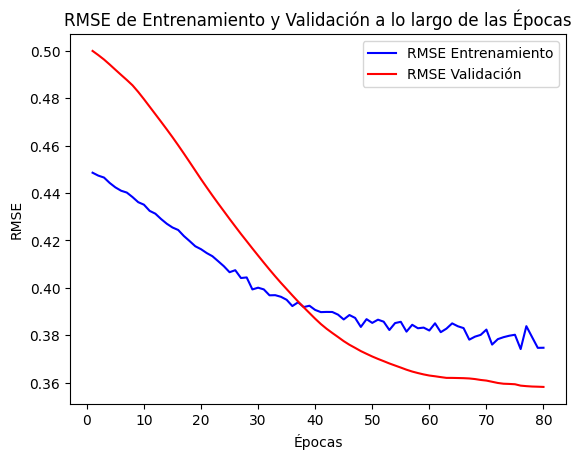

In [ ]:
# Obtener las pérdidas del historial
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Calcular el RMSE para entrenamiento y validación
train_rmse = np.sqrt(train_loss)
val_rmse = np.sqrt(val_loss)

# Crear la gráfica
epochs = range(1, len(train_rmse) + 1)

plt.plot(epochs, train_rmse, 'b', label='RMSE Entrenamiento')
plt.plot(epochs, val_rmse, 'r', label='RMSE Validación')
plt.title('RMSE de Entrenamiento y Validación a lo largo de las Épocas')
plt.xlabel('Épocas')
plt.ylabel('RMSE')
plt.legend()
plt.savefig('GRU_2')
plt.show()

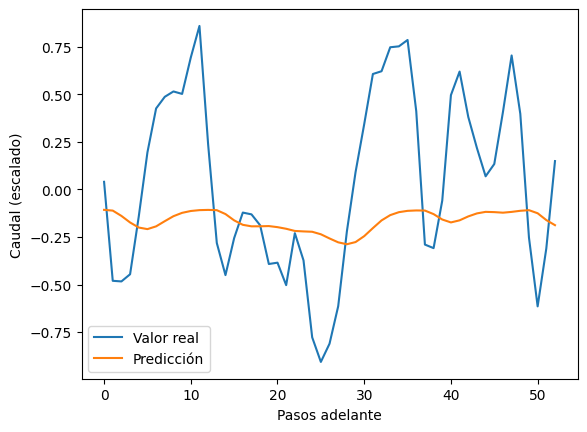

In [ ]:
N = len(predictions.flatten())    # Número de predicciones

plt.plot(range(N), y_ts_s.flatten(), label='Valor real')
plt.plot(range(N), predictions.flatten(), label='Predicción')
plt.xlabel("Pasos adelante")
plt.ylabel("Caudal (escalado)")
plt.legend()
plt.savefig('GRU2_pred')
plt.show()

##Tercera Iteración

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential()

# Agregar la primera capa GRU con 64 unidades y función de activación 'relu'
model.add(tf.keras.layers.GRU(64, activation='relu', return_sequences=True, input_shape=INPUT_SHAPE))

# Agregar capas GRU adicionales según sea necesario
model.add(tf.keras.layers.GRU(32, activation='relu', return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.0001)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.GRU(16, activation='relu', return_sequences=False, kernel_regularizer=tf.keras.regularizers.l2(0.0001)))  # La última capa no necesita return_sequences=False
#model.add(tf.keras.layers.Dropout(0.2))

# Agregar una capa de salida, por ejemplo, una capa densa para la predicción
model.add(Dense(long_salida, activation='linear'))

# Compilar el modelo
model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.0001), loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(x_tr_s, y_tr_s, epochs=80, batch_size=256, validation_data=(x_vl_s, y_vl_s))

# Evaluar el modelo en el conjunto de prueba
loss = model.evaluate(x_ts_s, y_ts_s)
print(f'Pérdida en el conjunto de prueba: {loss}')

# Hacer predicciones en nuevos datos
predictions = model.predict(x_ts_s)



Epoch 1/80
3/3 [==============================] - 6s 352ms/step - loss: 0.2000 - val_loss: 0.2471
Epoch 2/80
3/3 [==============================] - 0s 89ms/step - loss: 0.1989 - val_loss: 0.2453
Epoch 3/80
3/3 [==============================] - 0s 84ms/step - loss: 0.1977 - val_loss: 0.2435
Epoch 4/80
3/3 [==============================] - 0s 91ms/step - loss: 0.1967 - val_loss: 0.2416
Epoch 5/80
3/3 [==============================] - 0s 165ms/step - loss: 0.1953 - val_loss: 0.2397
Epoch 6/80
3/3 [==============================] - 0s 157ms/step - loss: 0.1944 - val_loss: 0.2377
Epoch 7/80
3/3 [==============================] - 0s 146ms/step - loss: 0.1926 - val_loss: 0.2352
Epoch 8/80
3/3 [==============================] - 0s 140ms/step - loss: 0.1911 - val_loss: 0.2322
Epoch 9/80
3/3 [==============================] - 0s 141ms/step - loss: 0.1896 - val_loss: 0.2289
Epoch 10/80
3/3 [==============================] - 0s 144ms/step - loss: 0.1872 - val_loss: 0.2256
Epoch 11/80
3/3 [=====

In [ ]:
# Cálculo de rmses para train, val y test
rmse_tr = model.evaluate(x=x_tr_s, y=y_tr_s, verbose=0)
rmse_vl = model.evaluate(x=x_vl_s, y=y_vl_s, verbose=0)
rmse_ts = model.evaluate(x=x_ts_s, y=y_ts_s, verbose=0)

# Imprimir resultados en pantalla
print('Comparativo desempeños:')
print(f'  RMSE train:\t {rmse_tr:.3f}')
print(f'  RMSE val:\t {rmse_vl:.3f}')
print(f'  RMSE test:\t {rmse_ts:.3f}')

Comparativo desempeños:
  RMSE train:	 0.137
  RMSE val:	 0.123
  RMSE test:	 0.252


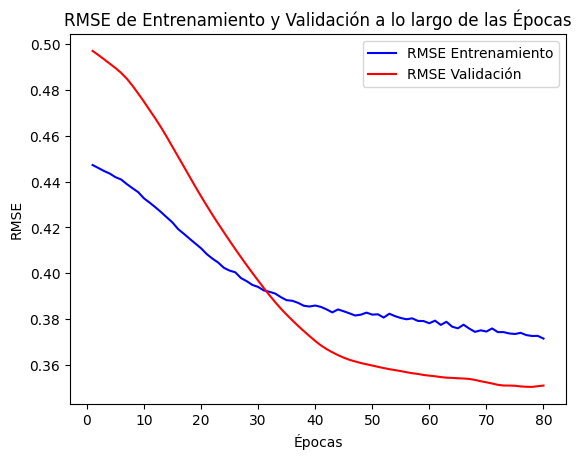

In [ ]:
# Obtener las pérdidas del historial
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Calcular el RMSE para entrenamiento y validación
train_rmse = np.sqrt(train_loss)
val_rmse = np.sqrt(val_loss)

# Crear la gráfica
epochs = range(1, len(train_rmse) + 1)

plt.plot(epochs, train_rmse, 'b', label='RMSE Entrenamiento')
plt.plot(epochs, val_rmse, 'r', label='RMSE Validación')
plt.title('RMSE de Entrenamiento y Validación a lo largo de las Épocas')
plt.xlabel('Épocas')
plt.ylabel('RMSE')
plt.legend()
plt.savefig('GRU_3')
plt.show()

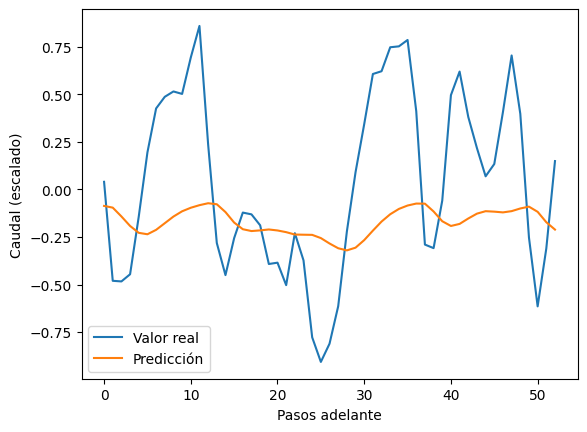

In [ ]:
N = len(predictions.flatten())    # Número de predicciones

plt.plot(range(N), y_ts_s.flatten(), label='Valor real')
plt.plot(range(N), predictions.flatten(), label='Predicción')
plt.xlabel("Pasos adelante")
plt.ylabel("Caudal (escalado)")
plt.legend()
plt.savefig('GRU3_pred')
plt.show()

#VAR

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Verificar la estacionariedad de las series de tiempo
def check_stationarity(series):
    result = adfuller(series)
    return result[1] <= 0.05  # Prueba de Dickey-Fuller: p-valor <= 0.05 indica estacionariedad

In [ ]:
#check_stationarity(caudal)

##Primera Iteración

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 06, Dec, 2023
Time:                     17:54:20
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -27.8169
Nobs:                     773.000    HQIC:                  -27.9279
Log likelihood:           5366.79    FPE:                6.93259e-13
AIC:                     -27.9974    Det(Omega_mle):     6.66969e-13
--------------------------------------------------------------------
Results for equation AMMsst
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.022738         0.015834            1.436           0.151
L1.AMMsst         0.893677         0.016098           55.515           0.000
L1.BEST          -0.018086         0.041063           -0.440           0.66

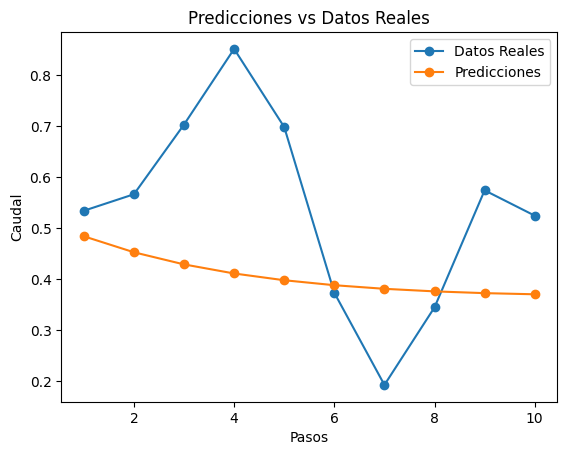

In [ ]:
import pandas as pd
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse

# Cargar los datos de series de tiempo multivariadas en un DataFrame
# Aquí, supondremos que tienes un DataFrame llamado 'data' con varias columnas de series de tiempo
# Asegúrate de que tus datos estén en un formato adecuado para el análisis VAR

# Seleccionar las variables que deseas incluir en el modelo VAR
selected_vars = ['AMMsst', 'BEST', 'NINO3', 'NINO34', 'caudal']

# Filtrar el DataFrame para incluir solo las variables seleccionadas
data = merged_df_scaler

# Verificar y tratar la estacionariedad si es necesario
for col in data.columns:
    if not check_stationarity(data[col]):
        # Realizar diferenciación para hacer que la serie sea estacionaria
        data[col] = data[col].diff().dropna()

# Crear y ajustar el modelo VAR
model = VAR(data)
model_fitted = model.fit()

# Resumen del modelo
model_summary = model_fitted.summary()
print(model_summary)

# Realizar predicciones
lag_order = model_fitted.k_ar
forecast = model_fitted.forecast(data.values[-lag_order:], steps=10)  # Predicción de 5 pasos hacia adelante
forecast_df = pd.DataFrame(forecast, columns=data.columns)

# Calcular el error de la predicción (RMSE)
actual_data = data[-10:]  # Últimos 5 valores observados
forecast_df.index = actual_data.index

rmse_value = rmse(forecast, actual_data)
print(f"RMSE: {rmse_value}")

# Visualizar las predicciones y los datos reales en un gráfico
plt.plot(range(1, 11), actual_data['caudal'], label='Datos Reales', marker='o')
plt.plot(range(1, 11), forecast_df['caudal'], label='Predicciones', marker='o')
plt.title('Predicciones vs Datos Reales')
plt.xlabel('Pasos')
plt.ylabel('Caudal')
plt.legend()
plt.savefig('VAR_1')
plt.show()


##Segunda Iteración

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 06, Dec, 2023
Time:                     17:54:20
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -15.1384
Nobs:                     773.000    HQIC:                  -15.1828
Log likelihood:           2600.37    FPE:                2.47814e-07
AIC:                     -15.2106    Det(Omega_mle):     2.44006e-07
--------------------------------------------------------------------
Results for equation AMMsst
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.040177         0.013462            2.984           0.003
L1.AMMsst         0.900533         0.016144           55.780           0.000
L1.NINO3          0.023030         0.017859            1.290           0.19

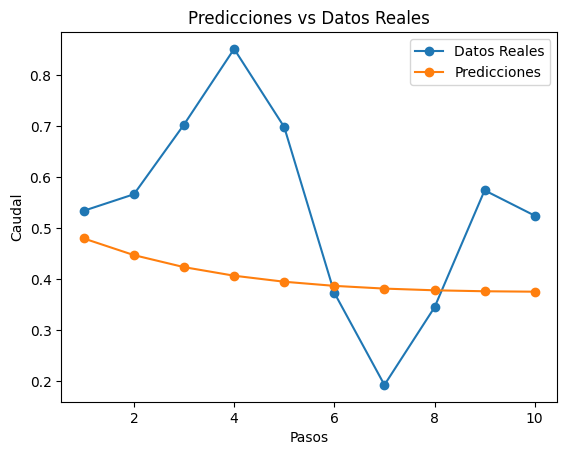

In [ ]:
import pandas as pd
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

# Cargar los datos de series de tiempo multivariadas en un DataFrame
# Aquí, supondremos que tienes un DataFrame llamado 'data' con varias columnas de series de tiempo
# Asegúrate de que tus datos estén en un formato adecuado para el análisis VAR

# Seleccionar las variables que deseas incluir en el modelo VAR
selected_vars = ['AMMsst', 'NINO3', 'caudal']

# Filtrar el DataFrame para incluir solo las variables seleccionadas
data = merged_df_scaler[selected_vars]

# Verificar y tratar la estacionariedad si es necesario
for col in data.columns:
    if not check_stationarity(data[col]):
        # Realizar diferenciación para hacer que la serie sea estacionaria
        data[col] = data[col].diff().dropna()

# Crear y ajustar el modelo VAR
model = VAR(data)
model_fitted = model.fit()

# Resumen del modelo
model_summary = model_fitted.summary()
print(model_summary)

# Realizar predicciones
lag_order = model_fitted.k_ar
forecast = model_fitted.forecast(data.values[-lag_order:], steps=10)  # Predicción de 5 pasos hacia adelante
forecast_df = pd.DataFrame(forecast, columns=data.columns)

# Calcular el error de la predicción (RMSE)
actual_data = data[-10:]  # Últimos 10 valores observados
forecast_df.index = actual_data.index

rmse_value = rmse(forecast, actual_data)
print(f"RMSE: {rmse_value}")

# Visualizar las predicciones y los datos reales en un gráfico
plt.plot(range(1, 11), actual_data['caudal'], label='Datos Reales', marker='o')
plt.plot(range(1, 11), forecast_df['caudal'], label='Predicciones', marker='o')
plt.title('Predicciones vs Datos Reales')
plt.xlabel('Pasos')
plt.ylabel('Caudal')
plt.legend()
plt.savefig('VAR_2')
plt.show()
